In [20]:
!python -m pip install imbalanced-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("meta-dataset.csv")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Train Test Split**

In [21]:
# split df into x and y
x = df.iloc[:, 1:9]
y = df.iloc[:, 9]

# Random oversampler
ros = RandomOverSampler(random_state=42, sampling_strategy={0:113, 1:148, 2:113})
x_os, y_os = ros.fit_resample(x, y)

# SMOTE oversampler
sm = SMOTE(random_state=42, sampling_strategy={0:113, 1:148, 2:113})
x_sm, y_sm = sm.fit_resample(x, y)

# Train Test Split 90-10
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
x_trainsm, x_testsm, y_trainsm, y_testsm = train_test_split(x_sm, y_sm, test_size=0.1, random_state=42)
x_trainos, x_testos, y_trainos, y_testos = train_test_split(x_os, y_os, test_size=0.1, random_state=42)

**Training D using kNN**

Accuracy of default kNN: 0.6057142857142858
Optimal kNN training accuracy: 0.6857142857142857 {'metric': 'chebyshev', 'n_neighbors': 53, 'weights': 'distance'}


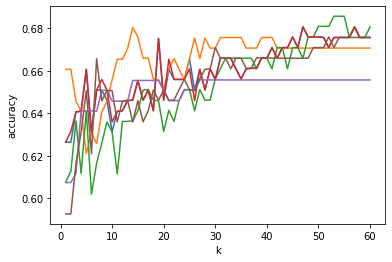

Accuracy of kNN for test data: 0.7391304347826086


In [22]:
# Check accuracy of default kNN (k = 5)
knn = KNeighborsClassifier()
kfold = KFold(n_splits=10)
default_acc = cross_val_score(knn, x_train, y_train, cv=kfold, scoring='accuracy')
print('Accuracy of default kNN:', default_acc.mean())

# Find best parameter and accuracy using GridSearchCV
param_grid = {'weights': ['distance'], 'metric': ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'cosine', 'euclidean'], 'n_neighbors': list(range(1, 61))}
knn_grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, scoring='accuracy', cv=kfold)
knn_op = knn_grid.fit(x_train, y_train)
print('Optimal kNN training accuracy:', knn_op.best_score_, knn_op.best_params_)

# Plot kNN accuracy vs k
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(range(1, 61), knn_op.cv_results_['mean_test_score'][0:60], label = "Braycurtis")
plt.plot(range(1, 61), knn_op.cv_results_['mean_test_score'][60:120], label = "Canberra")
plt.plot(range(1, 61), knn_op.cv_results_['mean_test_score'][120:180], label = "Chebyshev")
plt.plot(range(1, 61), knn_op.cv_results_['mean_test_score'][180:240], label = "Cityblock")
plt.plot(range(1, 61), knn_op.cv_results_['mean_test_score'][240:300], label = "Cosine")
plt.plot(range(1, 61), knn_op.cv_results_['mean_test_score'][300:360], label = "Euclidean")
plt.show()

# Evaluate the optimal kNN using test data
print('Accuracy of kNN for test data:', accuracy_score(y_test, knn_op.best_estimator_.predict(x_test)))

**Training D-SMOTE using kNN**

Accuracy of default kNN: 0.5592691622103387
Optimal kNN training accuracy: 0.6906417112299466 {'metric': 'cosine', 'n_neighbors': 4, 'weights': 'distance'}


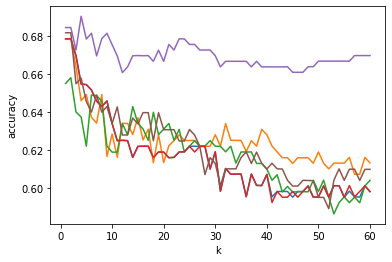

Accuracy of kNN for test data: 0.631578947368421


In [23]:
# Check accuracy of default kNN (k = 5)
knn = KNeighborsClassifier()
kfold = KFold(n_splits=10)
default_acc = cross_val_score(knn, x_trainsm, y_trainsm, cv=kfold, scoring='accuracy')
print('Accuracy of default kNN:', default_acc.mean())

# Find best parameter and accuracy using GridSearchCV
param_grid = {'weights': ['distance'], 'metric': ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'cosine', 'euclidean'], 'n_neighbors': list(range(1, 61))}
knn_grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, scoring='accuracy', cv=kfold)
knn_opsm = knn_grid.fit(x_trainsm, y_trainsm)
print('Optimal kNN training accuracy:', knn_opsm.best_score_, knn_opsm.best_params_)

# Plot kNN accuracy vs k
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(range(1, 61), knn_opsm.cv_results_['mean_test_score'][0:60], label = "Braycurtis")
plt.plot(range(1, 61), knn_opsm.cv_results_['mean_test_score'][60:120], label = "Canberra")
plt.plot(range(1, 61), knn_opsm.cv_results_['mean_test_score'][120:180], label = "Chebyshev")
plt.plot(range(1, 61), knn_opsm.cv_results_['mean_test_score'][180:240], label = "Cityblock")
plt.plot(range(1, 61), knn_opsm.cv_results_['mean_test_score'][240:300], label = "Cosine")
plt.plot(range(1, 61), knn_opsm.cv_results_['mean_test_score'][300:360], label = "Euclidean")
plt.show()

# Evaluate the optimal kNN using test data
print('Accuracy of kNN for test data:', accuracy_score(y_testsm, knn_opsm.best_estimator_.predict(x_testsm)))

**Training D-ROS using kNN**

Accuracy of default kNN: 0.6725490196078432
Optimal kNN training accuracy: 0.8748663101604277 {'metric': 'canberra', 'n_neighbors': 1, 'weights': 'distance'}


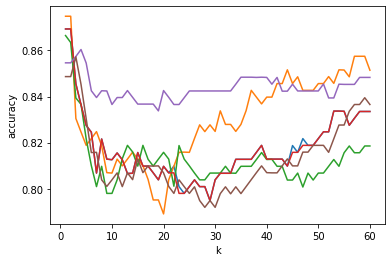

Accuracy of kNN for test data: 0.8421052631578947


In [24]:
# Check accuracy of default kNN (k = 5)
knn = KNeighborsClassifier()
kfold = KFold(n_splits=10)
default_acc = cross_val_score(knn, x_trainos, y_trainos, cv=kfold, scoring='accuracy')
print('Accuracy of default kNN:', default_acc.mean())

# Find best parameter and accuracy using GridSearchCV
param_grid = {'weights': ['distance'], 'metric': ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'cosine', 'euclidean'], 'n_neighbors': list(range(1, 61))}
knn_grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, scoring='accuracy', cv=kfold)
knn_opos = knn_grid.fit(x_trainos, y_trainos)
print('Optimal kNN training accuracy:', knn_opos.best_score_, knn_opos.best_params_)

# Plot kNN accuracy vs k
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(range(1, 61), knn_opos.cv_results_['mean_test_score'][0:60], label = "Braycurtis")
plt.plot(range(1, 61), knn_opos.cv_results_['mean_test_score'][60:120], label = "Canberra")
plt.plot(range(1, 61), knn_opos.cv_results_['mean_test_score'][120:180], label = "Chebyshev")
plt.plot(range(1, 61), knn_opos.cv_results_['mean_test_score'][180:240], label = "Cityblock")
plt.plot(range(1, 61), knn_opos.cv_results_['mean_test_score'][240:300], label = "Cosine")
plt.plot(range(1, 61), knn_opos.cv_results_['mean_test_score'][300:360], label = "Euclidean")
plt.show()

# Evaluate the optimal kNN using test data
print('Accuracy of kNN for test data:', accuracy_score(y_testos, knn_opos.best_estimator_.predict(x_testos)))

**Training D with DT**

Accuracy of default DT: 0.516904761904762 

Optimal DT actual depth: 2 

Optimal DT training accuracy: 0.6759523809523811 {'class_weight': None, 'criterion': 'entropy', 'max_depth': 2} 



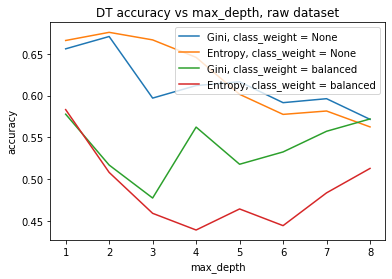


Accuracy of DT for test data: 0.7391304347826086



[Text(0.5, 0.8333333333333334, 'X[1] <= 0.418\nentropy = 1.233\nsamples = 203\nvalue = [19, 131, 53]'),
 Text(0.25, 0.5, 'X[0] <= 0.04\nentropy = 1.158\nsamples = 194\nvalue = [14, 131, 49]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.912\nsamples = 81\nvalue = [7, 65, 9]'),
 Text(0.375, 0.16666666666666666, 'entropy = 1.232\nsamples = 113\nvalue = [7, 66, 40]'),
 Text(0.75, 0.5, 'X[2] <= 0.54\nentropy = 0.991\nsamples = 9\nvalue = [5, 0, 4]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.65\nsamples = 6\nvalue = [5, 0, 1]')]

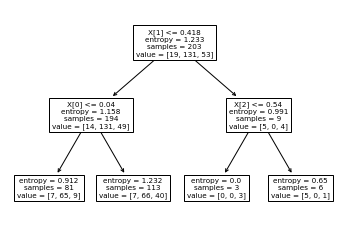

In [25]:
# Check accuracy of default sklearn DT + project hDT specifications. Refer to https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
dt = DecisionTreeClassifier(max_depth = 2, class_weight = 'balanced')
kfold = KFold(n_splits=10)
default_acc = cross_val_score(dt, x_train, y_train, cv=kfold, scoring='accuracy')
print('Accuracy of default DT:', default_acc.mean(), "\n")

# Find best parameter and accuracy using GridSearchCV
param_grid = dict(class_weight = [None, 'balanced'], criterion = ["gini", "entropy"], max_depth = list(range(1,9)))
dt_grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, scoring='accuracy', cv=kfold)
dt_op = dt_grid.fit(x_train, y_train)
print("Optimal DT actual depth:", dt_op.best_estimator_.tree_.max_depth, "\n")
print('Optimal DT training accuracy:', dt_op.best_score_, dt_op.best_params_, "\n") 

# Plot a comparison plot for different parameters
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('DT accuracy vs max_depth, raw dataset')
plt.plot(range(1, 9), dt_op.cv_results_['mean_test_score'][0:8], label = "Gini, class_weight = None")
plt.plot(range(1, 9), dt_op.cv_results_['mean_test_score'][8:16], label = "Entropy, class_weight = None")
plt.plot(range(1, 9), dt_op.cv_results_['mean_test_score'][16:24], label = "Gini, class_weight = balanced")
plt.plot(range(1, 9), dt_op.cv_results_['mean_test_score'][24:32], label = "Entropy, class_weight = balanced")
plt.legend()
plt.savefig("dt_raw.svg")
plt.show()
print("")


# Evaluate the optimal DT using test data
print('Accuracy of DT for test data:', accuracy_score(y_test, dt_op.best_estimator_.predict(x_test)))
print("")

# Print the DT 
plot_tree(dt_op.best_estimator_)

**Training D-SMOTE with DT**

Accuracy of default DT: 0.4433155080213903 

Optimal DT actual depth: 8 

Optimal DT training accuracy: 0.592245989304813 {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 8} 



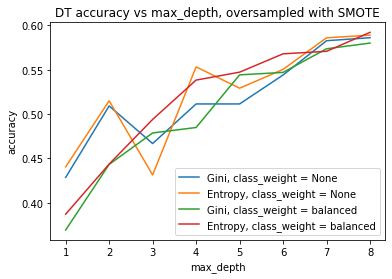


Accuracy of DT for test data: 0.5789473684210527



[Text(0.7171052631578947, 0.9444444444444444, 'X[1] <= 0.397\nentropy = 1.585\nsamples = 336\nvalue = [112.0, 112.0, 112.0]'),
 Text(0.4868421052631579, 0.8333333333333334, 'X[0] <= 0.04\nentropy = 1.577\nsamples = 302\nvalue = [86.495, 112.0, 100.154]'),
 Text(0.23108552631578946, 0.7222222222222222, 'X[2] <= 0.479\nentropy = 1.37\nsamples = 113\nvalue = [39.921, 56.427, 11.846]'),
 Text(0.14638157894736842, 0.6111111111111112, 'X[2] <= 0.19\nentropy = 1.135\nsamples = 53\nvalue = [9.98, 34.198, 4.308]'),
 Text(0.10855263157894737, 0.5, 'X[1] <= 0.261\nentropy = 1.43\nsamples = 25\nvalue = [9.98, 11.115, 3.231]'),
 Text(0.07236842105263158, 0.3888888888888889, 'X[5] <= 0.08\nentropy = 1.409\nsamples = 21\nvalue = [5.545, 11.115, 3.231]'),
 Text(0.039473684210526314, 0.2777777777777778, 'X[3] <= 0.672\nentropy = 0.962\nsamples = 9\nvalue = [0.0, 5.13, 3.231]'),
 Text(0.02631578947368421, 0.16666666666666666, 'X[0] <= 0.028\nentropy = 0.931\nsamples = 5\nvalue = [0.0, 1.71, 3.231]'),
 T

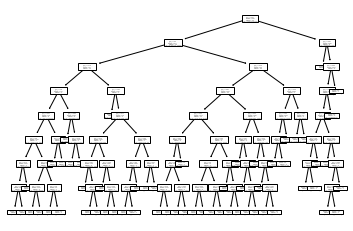

In [26]:
# Check accuracy of default sklearn DT + project hDT specifications. Refer to https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
dt = DecisionTreeClassifier(max_depth = 2, class_weight = 'balanced')
kfold = KFold(n_splits=10)
default_acc = cross_val_score(dt, x_trainsm, y_trainsm, cv=kfold, scoring='accuracy')
print('Accuracy of default DT:', default_acc.mean(), "\n")

# Find best parameter and accuracy using GridSearchCV
param_grid = dict(class_weight = [None, 'balanced'], criterion = ["gini", "entropy"], max_depth = list(range(1,9)))
dt_grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, scoring='accuracy', cv=kfold)
dt_opsm = dt_grid.fit(x_trainsm, y_trainsm)
print("Optimal DT actual depth:", dt_opsm.best_estimator_.tree_.max_depth, "\n")
print('Optimal DT training accuracy:', dt_opsm.best_score_, dt_opsm.best_params_, "\n") 

# Plot a comparison plot for different parameters
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('DT accuracy vs max_depth, oversampled with SMOTE')
plt.plot(range(1, 9), dt_opsm.cv_results_['mean_test_score'][0:8], label = "Gini, class_weight = None")
plt.plot(range(1, 9), dt_opsm.cv_results_['mean_test_score'][8:16], label = "Entropy, class_weight = None")
plt.plot(range(1, 9), dt_opsm.cv_results_['mean_test_score'][16:24], label = "Gini, class_weight = balanced")
plt.plot(range(1, 9), dt_opsm.cv_results_['mean_test_score'][24:32], label = "Entropy, class_weight = balanced")
plt.legend()
plt.savefig("dt_smote.svg")
plt.show()
print("")


# Evaluate the optimal DT using test data
print('Accuracy of DT for test data:', accuracy_score(y_testsm, dt_opsm.best_estimator_.predict(x_testsm)), end = "\n")
print("")

# Print the DT 
plot_tree(dt_opsm.best_estimator_)

**Training D-ROS with DT**

Accuracy of default DT: 0.5442959001782531 

Optimal DT actual depth: 8 

Optimal DT training accuracy: 0.7947415329768271 {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 8} 



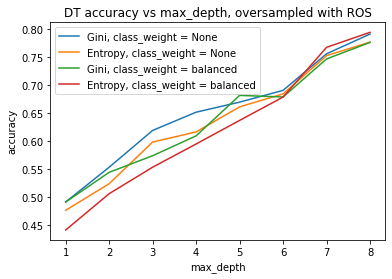


Accuracy of DT for test data: 0.7368421052631579



[Text(0.6739130434782609, 0.9444444444444444, 'X[1] <= 0.385\nentropy = 1.585\nsamples = 336\nvalue = [112.0, 112.0, 112.0]'),
 Text(0.41304347826086957, 0.8333333333333334, 'X[2] <= 0.309\nentropy = 1.56\nsamples = 291\nvalue = [70.97, 109.435, 106.615]'),
 Text(0.2391304347826087, 0.7222222222222222, 'X[1] <= 0.142\nentropy = 1.471\nsamples = 174\nvalue = [33.267, 52.153, 89.385]'),
 Text(0.15579710144927536, 0.6111111111111112, 'X[3] <= 0.724\nentropy = 1.029\nsamples = 80\nvalue = [3.327, 19.664, 58.154]'),
 Text(0.10869565217391304, 0.5, 'X[1] <= 0.129\nentropy = 0.834\nsamples = 64\nvalue = [0.0, 17.099, 47.385]'),
 Text(0.09420289855072464, 0.3888888888888889, 'X[2] <= 0.274\nentropy = 0.91\nsamples = 53\nvalue = [0.0, 17.099, 35.538]'),
 Text(0.057971014492753624, 0.2777777777777778, 'X[7] <= 0.877\nentropy = 0.969\nsamples = 42\nvalue = [0.0, 16.244, 24.769]'),
 Text(0.028985507246376812, 0.16666666666666666, 'X[1] <= 0.112\nentropy = 0.998\nsamples = 34\nvalue = [0.0, 15.389,

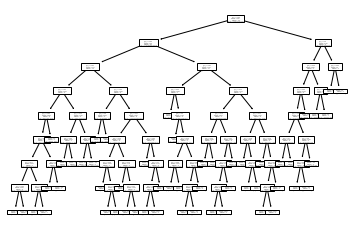

In [27]:
# Check accuracy of default sklearn DT + project hDT specifications. Refer to https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
dt = DecisionTreeClassifier(max_depth = 2, class_weight = 'balanced')
kfold = KFold(n_splits=10)
default_acc = cross_val_score(dt, x_trainos, y_trainos, cv=kfold, scoring='accuracy')
print('Accuracy of default DT:', default_acc.mean(), "\n")

# Find best parameter and accuracy using GridSearchCV
param_grid = dict(class_weight = [None, 'balanced'], criterion = ["gini", "entropy"], max_depth = list(range(1,9)))
dt_grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, scoring='accuracy', cv=kfold)
dt_opos = dt_grid.fit(x_trainos, y_trainos)
print("Optimal DT actual depth:", dt_opos.best_estimator_.tree_.max_depth, "\n")
print('Optimal DT training accuracy:', dt_opos.best_score_, dt_opos.best_params_, "\n") 

# Plot a comparison plot for different parameters
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('DT accuracy vs max_depth, oversampled with ROS')
plt.plot(range(1, 9), dt_opos.cv_results_['mean_test_score'][0:8], label = "Gini, class_weight = None")
plt.plot(range(1, 9), dt_opos.cv_results_['mean_test_score'][8:16], label = "Entropy, class_weight = None")
plt.plot(range(1, 9), dt_opos.cv_results_['mean_test_score'][16:24], label = "Gini, class_weight = balanced")
plt.plot(range(1, 9), dt_opos.cv_results_['mean_test_score'][24:32], label = "Entropy, class_weight = balanced")
plt.legend()
plt.savefig("dt_ros.svg")
plt.show()
print("")

# Evaluate the optimal DT using test data
print('Accuracy of DT for test data:', accuracy_score(y_testos, dt_opos.best_estimator_.predict(x_testos)), end = "\n")
print("")

# Print the DT 
plot_tree(dt_opos.best_estimator_)

**Generating Meta Features**

In [28]:
# Return euclidean dist between two points in m-dimensional space
def euclidean_dist(p1, p2):
  return np.linalg.norm(p1 - p2)

# Return inverse distance given distance
def invd(dist):
  return 1 / (1 + dist)

# Calculate and return a beta value for each point/row in the dataframe
def generate_beta_row_wise(dataframe):
  rownum = dataframe.shape[0]
  colnum = dataframe.shape[1]

  # Get label/y-value given a row index
  def get_label(index):
    return dataframe.iloc[index]['label']
  # Get point/vector of x-values given a row index
  def get_vector(index):
    return np.array(dataframe.iloc[index])[1:colnum - 1] 
  
  # Create distance matrix. Not optimised to account for symmetry.
  distance_matrix = np.zeros((rownum, rownum)) 
  for index, vector in dataframe.iterrows():
    x_vec = np.array(vector[1:-1])
    for j_index, j_vector in dataframe.iterrows():
      if index != j_index:
        j_x_vec = np.array(j_vector[1:-1])
        distance_matrix[index, j_index] = euclidean_dist(x_vec, j_x_vec)
      
  
  # Create label counts. Note that uyi is the number of same-labelled points - 1.
  uyis = dict(dataframe['label'].value_counts())
  print(uyis)
  
  # Now for each row/point, obtain beta value and store in array.
  betas = np.zeros(rownum)
  for index in range(rownum):
    
    distances = distance_matrix[index]  
    vector_x = get_vector(index) 
    uyi = uyis[get_label(index)] 
    # -1 + 1 offset. Currently include itself, delete later.
    # Obtain kth smallest distance 
    furthest_dist = sorted(distances)[uyi]
    # this will include the 0th entry
    

    # Add to the numerator invd(d) for any point whose distance d from the current point
    # is smaller than distance[j], given that the point is not the current point,
    # and the point has the same label as the current point.
    # Distance[j] should be the distance from the point at index to point j.
      
    beta_numerator = sum([invd(distances[x]) for x in range(rownum) if \
                          distances[x] < furthest_dist and x != index and get_label(index) == get_label(x)])
    
    
    
    # Sum invd(distance) to all points from the current point, taking note to subtract 1 for 
    # invd(0), distance from the current point to itself
    beta_denominator = sum(list(map(lambda x: invd(x), distance_matrix[index]))) - 1  
    betas[index] = beta_numerator / beta_denominator
    print(f"num: {round(beta_numerator,4)}, denom: {round(beta_denominator,4)},\
    bounding dist: {round(furthest_dist,4)}, beta: {round(beta_numerator/beta_denominator,4)}")

    # Each beta value lies within [0, 1]
    assert(0 <= betas[index] <= 1)
  return betas

betas = generate_beta_row_wise(df)



{1: 148, 2: 58, 0: 20}
num: 87.3547, denom: 165.2596,    bounding dist: 0.5346, beta: 0.5286
num: 85.9979, denom: 164.5758,    bounding dist: 0.5046, beta: 0.5225
num: 85.6723, denom: 162.0568,    bounding dist: 0.4466, beta: 0.5287
num: 86.9847, denom: 166.4523,    bounding dist: 0.4953, beta: 0.5226
num: 84.1723, denom: 162.8415,    bounding dist: 0.499, beta: 0.5169
num: 86.042, denom: 166.1092,    bounding dist: 0.4906, beta: 0.518
num: 74.1227, denom: 149.567,    bounding dist: 0.561, beta: 0.4956
num: 84.0517, denom: 161.9932,    bounding dist: 0.4993, beta: 0.5189
num: 86.3347, denom: 164.5378,    bounding dist: 0.5371, beta: 0.5247
num: 85.9912, denom: 166.0343,    bounding dist: 0.4953, beta: 0.5179
num: 87.5624, denom: 166.206,    bounding dist: 0.5045, beta: 0.5268
num: 86.9117, denom: 166.383,    bounding dist: 0.4928, beta: 0.5224
num: 17.2538, denom: 143.4115,    bounding dist: 0.3858, beta: 0.1203
num: 6.1346, denom: 166.1129,    bounding dist: 0.1744, beta: 0.0369
num: 

In [29]:
def bin_betas(betas, num_bins):
  bin_width = 1 / num_bins
  beta_d = {}
  interval_dividers = []
  for i in range(num_bins):
    beta_d[(i * bin_width, (i + 1) * bin_width)] = 0
    interval_dividers.append(i * bin_width)
  
  interval_dividers.append(1)

  def binary_search(start, stop, value):
    if start >= stop - 1:
      return (interval_dividers[start], interval_dividers[stop])
    else:
      mid = (start + stop) // 2
      if value >= interval_dividers[mid]:
        return binary_search(mid, stop, value)
      else:
        return binary_search(start, mid, value)
  
  for value in betas:
    beta_d[binary_search(0, len(interval_dividers) - 1, value)] += 1 / len(betas)
  
  # Verify that it sums to 1
  assert(abs(sum(beta_d.values()) - 1) < 0.0001)
  return beta_d
    
bin_beta_vals = bin_betas(betas, 8)
# Values for interval
print("Values for interval: ")
for key, value in bin_beta_vals.items():
  print(f"{key}: {value}")

# As a vector
beta_values_vector = np.array(list(bin_beta_vals.values()))
beta = [beta_values_vector]
print(f"\nAs a vector:\n{pd.DataFrame(beta_values_vector)}")




Values for interval: 
(0.0, 0.125): 0.3451327433628323
(0.125, 0.25): 0
(0.25, 0.375): 0
(0.375, 0.5): 0.15044247787610632
(0.5, 0.625): 0.5044247787610626
(0.625, 0.75): 0
(0.75, 0.875): 0
(0.875, 1.0): 0

As a vector:
          0
0  0.345133
1  0.000000
2  0.000000
3  0.150442
4  0.504425
5  0.000000
6  0.000000
7  0.000000


**Evaluating the Results**

In [30]:
print(f"Prediction: {dt_opos.best_estimator_.predict(beta)}")

knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(max_depth = 2, class_weight = 'balanced')
kfold = KFold(n_splits=10)

print("DT ROS as h*D on base dataset")
print(f"h*D: {cross_val_score(dt_opos.best_estimator_, x, y, cv=kfold, scoring='accuracy').mean()}")
print()
print(f"h'D = default kNN: {cross_val_score(knn, x, y, cv=kfold, scoring='accuracy').mean()}")
print(f"Compare with default DT: {cross_val_score(dt, x, y, cv=kfold, scoring='accuracy').mean()}")
print()
print("Conclusion:") 
print("h*D is correct that default kNN is better than default DT")
print("h'D is better than h*D")


Prediction: [1]
DT ROS as h*D on base dataset
h*D: 0.4871541501976284

h'D = default kNN: 0.5978260869565217
Compare with default DT: 0.4254940711462451

Conclusion:
h*D is correct that default kNN is better than default DT
h'D is better than h*D
